In [72]:
#
# Librairies
#
import pandas as pd # On importe la librairie Pandas, que l'on surnomme 'pd' \n
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
# 
# chargement du fichier fr2.openfoodfacts.products.csv
#
# Le fichier est placé dans le repertoire courant. 
#
# Le fichier contient uniquement des produits vendus en France
#
datafr = pd.read_csv('fr2.openfoodfacts.products.csv', sep=',', dtype = {'code':str,
                                                                         'product_name':str, 
                                                                         'nutriscore_score': float, 
                                                                         'energy-kcal_100g': float}
                      )
# 
# 
#
datafr.shape

(6540, 69)

In [5]:
print(datafr.dtypes) 

code                                        object
product_name                                object
quantity                                    object
packaging                                   object
brands                                      object
                                            ...   
fruits-vegetables-nuts_100g                float64
fruits-vegetables-nuts-estimate_100g       float64
cocoa_100g                                 float64
carbon-footprint-from-meat-or-fish_100g    float64
nutrition-score-fr_100g                    float64
Length: 69, dtype: object


In [6]:
print(datafr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     6540 non-null   object 
 1   product_name                             6245 non-null   object 
 2   quantity                                 1718 non-null   object 
 3   packaging                                915 non-null    object 
 4   brands                                   3585 non-null   object 
 5   categories                               2080 non-null   object 
 6   origins                                  157 non-null    object 
 7   labels                                   1359 non-null   object 
 8   countries                                6540 non-null   object 
 9   ingredients_text                         1835 non-null   object 
 10  allergens                                517 non

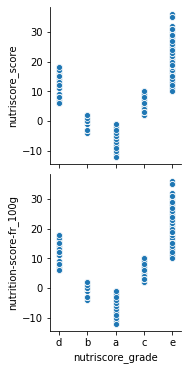

In [7]:
#
# Analyse bivariée préliminaire nutriscore_score et nutrition-score-fr_100g
#
#
sns.pairplot(datafr, x_vars=["nutriscore_grade"], y_vars=["nutriscore_score", "nutrition-score-fr_100g"])

#
# Cela me confirme que ces deux colonnes contiennent la même information et sont donc redondantes.
#

In [12]:
#
# Jetons un oeil sur les origines des produits
#
all_origins = datafr.groupby('origins')['code'].count()
# n_by_state.head(10)
print(all_origins)
# convertir l'index de la serie en colonne pour l'imprimer dans un fichier .csv
origins_modified = all_origins.reset_index()
print(origins_modified)
# on enregistre dans un fichier .csv
origins_modified.to_csv (r'fr.openfoodfacts.origins.csv', index = False, header=True)

# conclusion: pas d'information pertinente

origins
13/06/2019                     1
?                              1
Afrique du Sud                 1
Angleterre                     2
Ardèche,France                 3
                              ..
Émirats arabes unis            4
États-Unis                     2
États-Unis, Brésil, Mexique    1
États-unis                     2
états-unis                     1
Name: code, Length: 83, dtype: int64
                        origins  code
0                    13/06/2019     1
1                             ?     1
2                Afrique du Sud     1
3                    Angleterre     2
4                Ardèche,France     3
..                          ...   ...
78          Émirats arabes unis     4
79                   États-Unis     2
80  États-Unis, Brésil, Mexique     1
81                   États-unis     2
82                   états-unis     1

[83 rows x 2 columns]


<Figure size 2304x864 with 0 Axes>

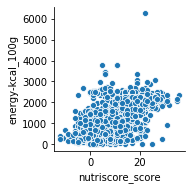

In [31]:
#
# Analyse bivariée préliminaire nutriscore_score et energy-kcal_100g
#
#
%matplotlib inline

plt.figure(figsize=(32, 12))

sns.pairplot(datafr, x_vars=["nutriscore_score"], y_vars=["energy-kcal_100g"])


<Figure size 2304x864 with 0 Axes>

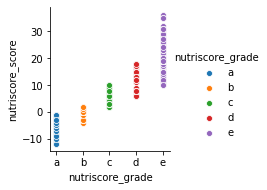

In [29]:
#
# Analyse bivariée préliminaire nutriscore_grade et nutriscore_score
#
#
%matplotlib inline
plt.figure(figsize=(32, 12))
sns.pairplot(datafr, x_vars=["nutriscore_grade"],
             y_vars=["nutriscore_score"],
             hue="nutriscore_grade",
             hue_order = ['a', 'b', 'c', 'd', 'e']
            )

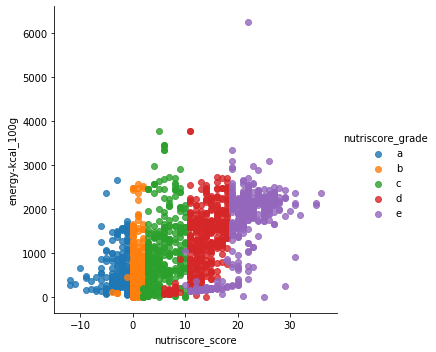

In [34]:
#
# Analyse bivariée préliminaire nutriscore_grade et energy-kcal_100g
#
#

# sns.pairplot(datafr, x_vars=["nutriscore_grade"], y_vars=["energy-kcal_100g"])

sns.lmplot("nutriscore_score", "energy-kcal_100g", 
           datafr, 
           hue="nutriscore_grade", 
           hue_order = ['a', 'b', 'c', 'd', 'e'],
           fit_reg=False
          )

In [43]:
datafr.shape

(6540, 69)

In [85]:
#
# Analyse sur les produits qui n'ont pas de Nutriscore 
#
score_null = datafr[datafr['nutriscore_grade'].isnull()]
score_null.shape
desc_null = score_null.describe()
print(desc_null)


       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                   814.000000                               814.000000   
mean                      0.044226                                 0.077396   
std                       0.222940                                 0.301950   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       3.000000                                 3.000000   

       nutriscore_score  nova_group  energy-kcal_100g  energy_100g  \
count               0.0  460.000000       3594.000000  3608.000000   
mean                NaN    3.908696       1093.658319  1093.612040   
std                 NaN    0.412668        809.962917   810.165219   
min     

In [86]:
#
# Analyse sur les produits qui ont de Nutriscore
#
score_notnull = datafr[datafr['nutriscore_grade'].notnull()]
score_notnull.shape
desc_notnull = score_notnull.describe()
print(desc_notnull)

       ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
count                  1021.000000                              1021.000000   
mean                      0.072478                                 0.142997   
std                       0.259405                                 0.459243   
min                       0.000000                                 0.000000   
25%                       0.000000                                 0.000000   
50%                       0.000000                                 0.000000   
75%                       0.000000                                 0.000000   
max                       1.000000                                 4.000000   

       nutriscore_score  nova_group  energy-kcal_100g  energy_100g  \
count       1685.000000  891.000000       1557.000000  1685.000000   
mean          10.244510    3.471380       1185.473346  1201.211371   
std            9.203404    0.886871        802.452975   808.538409   
min     

In [74]:
desc_null.columns

Index(['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g',
       'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g',
       'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-d_100g',
       'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g',
       'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g',
       'pantothenic-acid_100g', 'bicarbonate_100g', 'potassium_100g',
       'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g',
       'zinc_100g', 'copper_100g', 'manganese_100g', 'selenium_100g',
       'caffeine_100g', 'fruits

In [87]:
#
# Comparaison statistiques entre produits avec nutriscore et sans nutriscore
#

desc_null.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], ['energy-kcal_100g', 
                 'saturated-fat_100g', 
                 'sugars_100g', 
                 'sodium_100g', 
                 'fruits-vegetables-nuts_100g',
                 'fiber_100g',
                 'proteins_100g'
                ]]


,energy-kcal_100g,saturated-fat_100g,sugars_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g
mean,1093.658319,4.577985,16.981723,1.040798,NaN,4.013032,6.563205
std,809.962917,7.050237,20.216231,16.300347,NaN,15.930662,8.246636
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,385.000000,0.100000,1.700000,0.020000,NaN,0.500000,1.000000
50%,962.000000,1.500000,8.600000,0.160000,NaN,2.000000,4.800000
75%,1715.000000,6.030000,26.000000,0.400000,NaN,4.750000,9.000000
max,8142.000000,100.000000,100.000000,762.000000,NaN,375.000000,100.000000


In [88]:
desc_notnull.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max'], ['energy-kcal_100g', 
                 'saturated-fat_100g', 
                 'sugars_100g', 
                 'sodium_100g', 
                 'fruits-vegetables-nuts_100g',
                 'fiber_100g',
                 'proteins_100g'
                ]]

,energy-kcal_100g,saturated-fat_100g,sugars_100g,sodium_100g,fruits-vegetables-nuts_100g,fiber_100g,proteins_100g
mean,1185.473346,5.197253,17.084700,0.428090,34.900000,2.937675,6.880950
std,802.452975,7.379930,19.107307,1.207257,29.928359,4.178267,8.000283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,460.000000,0.100000,2.400000,0.040000,21.750000,0.600000,1.200000
50%,1130.000000,2.000000,10.000000,0.186800,28.500000,1.900000,5.400000
75%,1845.000000,8.500000,26.100000,0.400000,41.000000,3.500000,8.700000
max,6251.000000,80.000000,100.000000,26.400000,100.000000,44.000000,76.300000


In [103]:
effectifs = datafr["nutriscore_score"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités
#
tab = pd.DataFrame(modalites, columns = ["nutriscore_score"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / effectifs.sum() # effectifs.sum = total de produits avec Nutriscore
tab = tab.sort_values("nutriscore_score") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée F: fréquences cumulées


 0.0     88
 14.0    82
 3.0     76
 11.0    75
 13.0    75
 15.0    68
 2.0     65
 12.0    63
 22.0    62
-1.0     61
 18.0    58
 1.0     58
-3.0     56
 20.0    56
 4.0     54
 19.0    52
 21.0    51
-2.0     47
 16.0    46
 6.0     43
 7.0     41
 17.0    40
 5.0     38
 8.0     36
-4.0     36
 9.0     36
 23.0    34
 26.0    32
 25.0    27
 24.0    24
 10.0    24
-5.0     18
 27.0    18
-6.0     10
 28.0     7
 29.0     7
 31.0     4
-7.0      3
-9.0      3
-12.0     2
-8.0      2
 35.0     2
 36.0     1
 30.0     1
-11.0     1
 32.0     1
-10.0     1
Name: nutriscore_score, dtype: int64
Float64Index([  0.0,  14.0,   3.0,  11.0,  13.0,  15.0,   2.0,  12.0,  22.0,
               -1.0,  18.0,   1.0,  -3.0,  20.0,   4.0,  19.0,  21.0,  -2.0,
               16.0,   6.0,   7.0,  17.0,   5.0,   8.0,  -4.0,   9.0,  23.0,
               26.0,  25.0,  24.0,  10.0,  -5.0,  27.0,  -6.0,  28.0,  29.0,
               31.0,  -7.0,  -9.0, -12.0,  -8.0,  35.0,  36.0,  30.0, -11.0,
              

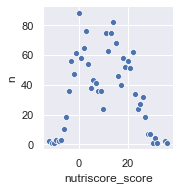

In [107]:
#
#

sns.pairplot(tab, x_vars=["nutriscore_score"], y_vars=["n"])

# sns.lmplot("nutriscore_score", "f", tab, hue="f", fit_reg=False)